# Initial Data Understanding & Business Goal

Steel Industry Energy Consuption Data is a time series data of energy consumption in a steel industrial plant. It shows how energy usage varies over the period of time, leading and lagging current reactive power along with their power factors and carbon emissions numbers associated with the usage. It also categorize usage by day of the week, weekday versus weekend and type of load at that point in time.

Business goals that can be explored with this data are :  
1. Optimize 'energy usage' which leads to cost savings and optimize carbon emissions.
2. Predict load type based on remaining features.

In [5]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.stats import norm
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [6]:
#Load the dataset and print out first few rows

df_steel = pd.read_csv("Steel_industry_data.csv")
df_steel.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [7]:
# Print info to know metadata information

df_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [8]:
# Rename some columns to simplify their names and reprint info

df_steel = df_steel.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'Lagging_Reactive_Power_kVarh',
                        'Leading_Current_Reactive_Power_kVarh': 'Leading_Reactive_Power_kVarh',
                        'Lagging_Current_Power_Factor': 'Lagging_Power_Factor',
                        'Leading_Current_Power_Factor': 'Leading_Power_Factor',
                        'CO2(tCO2)':'CO2'})
df_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          35040 non-null  object 
 1   Usage_kWh                     35040 non-null  float64
 2   Lagging_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                           35040 non-null  float64
 5   Lagging_Power_Factor          35040 non-null  float64
 6   Leading_Power_Factor          35040 non-null  float64
 7   NSM                           35040 non-null  int64  
 8   WeekStatus                    35040 non-null  object 
 9   Day_of_week                   35040 non-null  object 
 10  Load_Type                     35040 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.9+ MB


In [9]:
# Check number of rows and columns in the dataset

df_steel.shape

(35040, 11)

Inference :  
Dataset have 35040 rows and 11 features.

In [10]:
# Check for any missing values

df_steel.isnull().sum().sort_values(ascending=False)

date                            0
Usage_kWh                       0
Lagging_Reactive_Power_kVarh    0
Leading_Reactive_Power_kVarh    0
CO2                             0
Lagging_Power_Factor            0
Leading_Power_Factor            0
NSM                             0
WeekStatus                      0
Day_of_week                     0
Load_Type                       0
dtype: int64

Inference :  
There are no missing values in the dataset

In [11]:
# Statistical summary numerical features in the dataset

df_steel.describe()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Inference :  
Distribution of data looks skewed for some features, given higher differences of counts - max, 75% and <75%.  
Further investigation will be done by plotting them for outlier analysis.

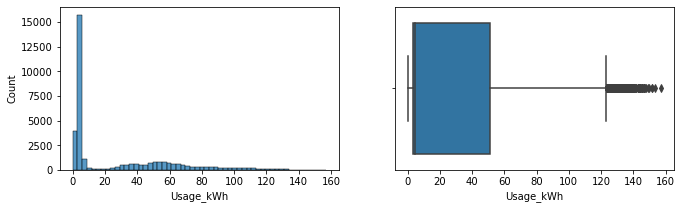

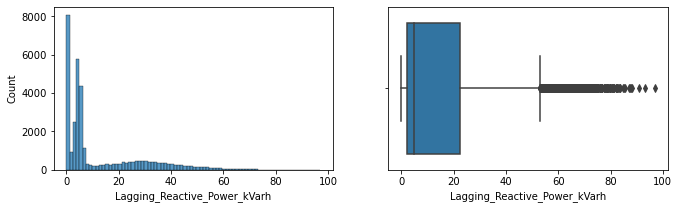

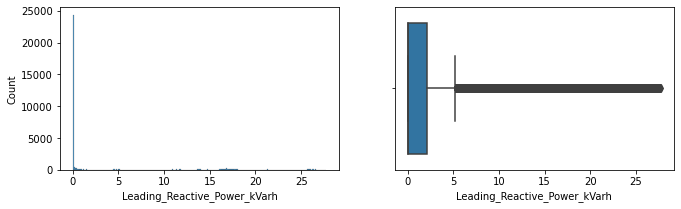

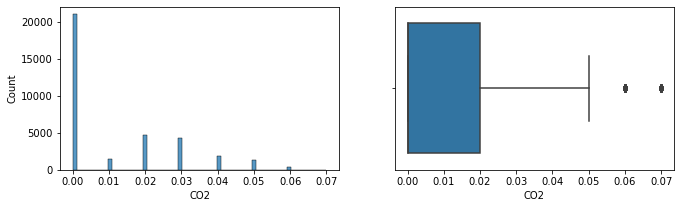

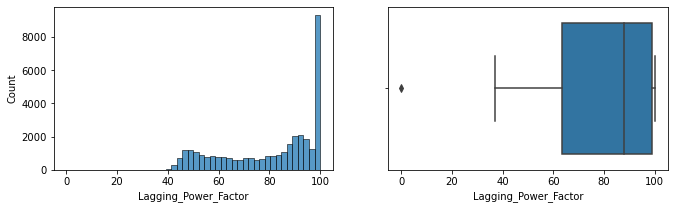

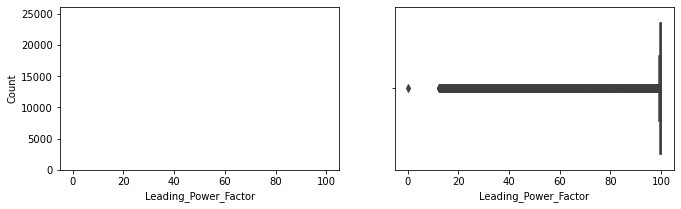

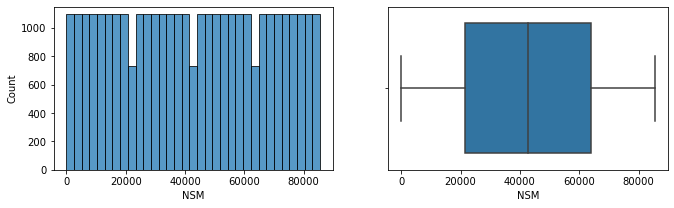

In [12]:
#Plot numerical columns distribution for outlier analysis

numerical = df_steel.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(11,3))
    sns.histplot(data=df_steel, x=col, ax=ax[0],palette='RdYlBu', multiple="stack")
    sns.boxplot(data=df_steel, x=col, ax=ax[1])

Ineference :  
Most of the features are either left or right skewed distribution. They will have to be handled appropriately for outliers.

# Data Preparation for Modelling

### Outlier Analysis
  
  Considerations :  
  
   1. Since the distributions are not normal and are skewed choosing to only remove extreme outliers by 3*IQR rule
   2. In outlier handling, excluding column with IQR = 0

In [13]:
# Finding outliers in all the numerical columns and handling them

numerical = df_steel.select_dtypes('number').columns

for col in numerical:
    q1 = df_steel[col].quantile(0.25)
    q3 = df_steel[col].quantile(0.75)
    iqr = q3-q1
    if iqr > 0:
        range_low  = q1-3*iqr
        range_high = q3+3*iqr
        df_steel = df_steel.loc[(df_steel[col] > range_low) & (df_steel[col] < range_high)]

df_steel.shape

(27935, 11)

Outliers analysis and handling result :   

   1. 7105 outliers are removed.  
   2. Now dataset have 27935 rows and 11 features

<Figure size 288x288 with 0 Axes>

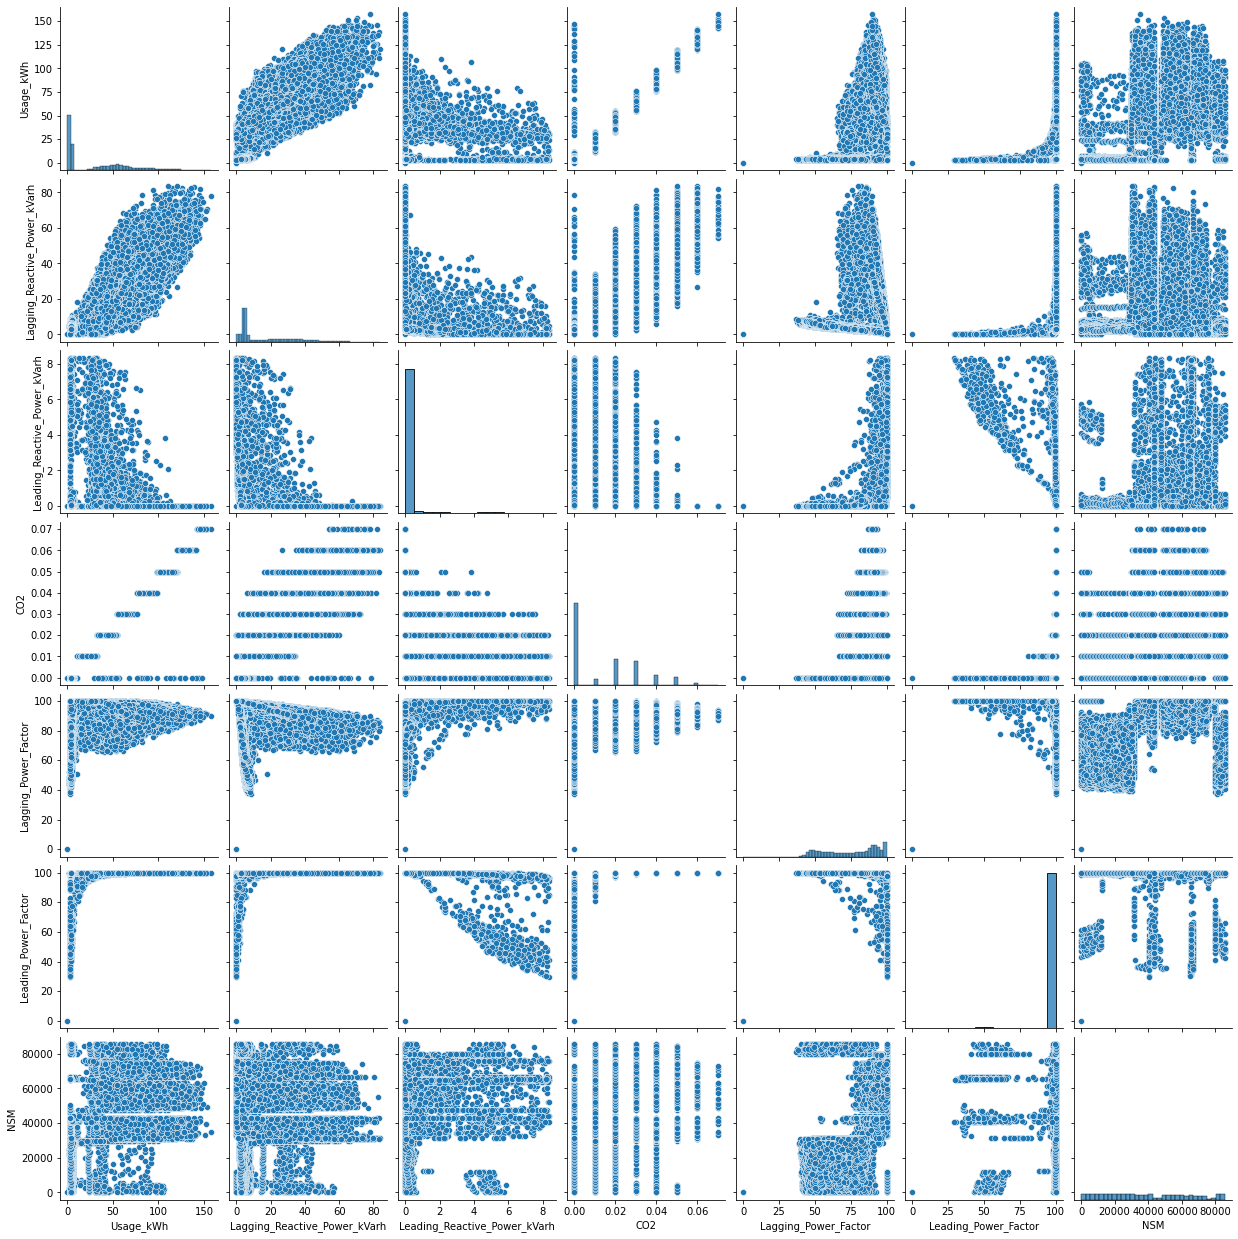

In [14]:
# Visualising the numerical variables
numerical = df_steel.select_dtypes('number').columns
plt.figure(figsize=(4,4))
sns.pairplot(df_steel[numerical])
plt.show()

Inference :  
1. Usage_kWh is showing strong linear relationship with Lagging_Reactive_Power_kVarh and CO2. While other features do have moderately linear relationships. Hence, they are attributes of interest for a linear regression model.
2. Further corealtion heatmap will be done.
        

### Analysis of Categorical features



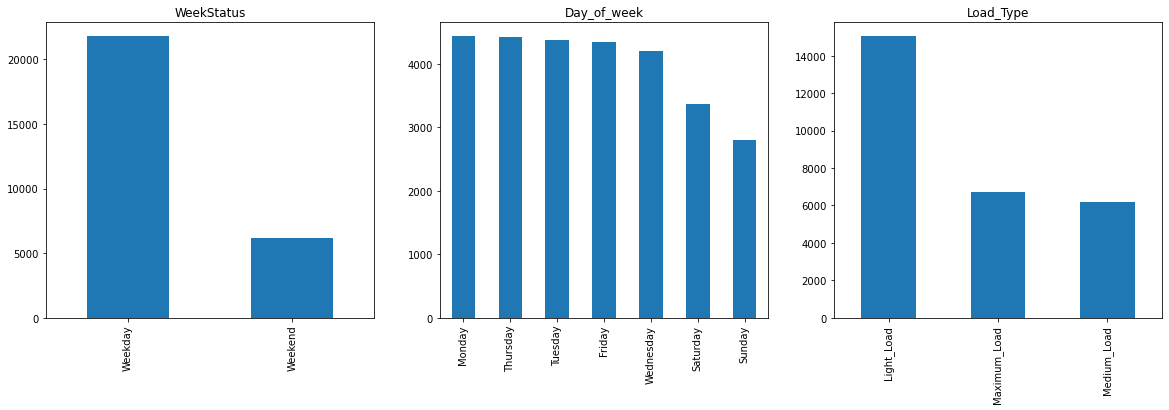

In [15]:
# Listing categorical columns for checking data imbalance and plotting them

col_category = ['WeekStatus','Day_of_week','Load_Type']

k=0
plt.figure(figsize=(20,25))
for col in col_category:    
    k=k+1
    plt.subplot(4, 3,k)    
    df_steel[col].value_counts().plot(kind='bar');
    plt.title(col)

Inference :  
    1. Light Load is almost double then Maximum and Medium loads. Load Type is heavier on Ligth Load.  
    2. Data for weekdays are similar counts while for weekdays are less with lowest on Sunday.


Categorical columns handling and encoding considerations : 

    1. Load Type is of ordinal type, so will use ordinal encoding.
    2. WeekStatus and Day_of_week are not ordinal, so we will use one-hot/dummy encoding.

### Encoding

In [16]:
# Load Type : Use Ordinal encoding technique
# Convert "Light_Load" to 1 and "Medium_Load" to 2 and "Maximum_Load" to 3
df_steel['Load_Type'] = df_steel['Load_Type'].map({'Light_Load': 1, 'Medium_Load': 2, 'Maximum_Load': 3})

In [17]:
# WeekStatus : Use OneHot/Dummy encoding
# Create dummy variables/dataframe for WeekStatus
Week_status = pd.get_dummies(df_steel['WeekStatus'])
# Concatenate dummy dataframe to main dataframe
df_steel = pd.concat([df_steel,Week_status], axis=1)
# Drop WeekStatus column as now we have onehot encoded dummy columns for weekstatus
df_steel = df_steel.drop('WeekStatus',axis=1)

In [18]:
# Day_of_week : Use OneHot/Dummy encoding
# Create dummy variables/dataframe for Day_of_week
DayOfWeek = pd.get_dummies(df_steel['Day_of_week'])
# Concatenate dummy dataframe to main dataframe
df_steel = pd.concat([df_steel,DayOfWeek], axis=1)
# Drop Day_of_week column as now we have onehot encoded dummy columns for weekstatus
df_steel = df_steel.drop('Day_of_week',axis=1)

In [19]:
# Date column will not have any bearing on our target variable usage and load Type, hence drop that
df_steel = df_steel.drop('date',axis=1)

In [20]:
df_steel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27935 entries, 0 to 35039
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Usage_kWh                     27935 non-null  float64
 1   Lagging_Reactive_Power_kVarh  27935 non-null  float64
 2   Leading_Reactive_Power_kVarh  27935 non-null  float64
 3   CO2                           27935 non-null  float64
 4   Lagging_Power_Factor          27935 non-null  float64
 5   Leading_Power_Factor          27935 non-null  float64
 6   NSM                           27935 non-null  int64  
 7   Load_Type                     27935 non-null  int64  
 8   Weekday                       27935 non-null  uint8  
 9   Weekend                       27935 non-null  uint8  
 10  Friday                        27935 non-null  uint8  
 11  Monday                        27935 non-null  uint8  
 12  Saturday                      27935 non-null  uint8  
 13  S

In [21]:
df_steel.shape

(27935, 17)

Inference :  
    1. Finally we have 27935 rows and 17 columns after categoricaly column encoding and outlier removal.  
    2. All features are converted to numerical which are necessary for linear regression.

### Splitting dataset into Training set and Test set

In [22]:
# Splitting the entire dataset into train and test with 70:30 percent ratio.

df_steel_train, df_steel_test = train_test_split(df_steel, train_size=0.7, random_state=100)
print(df_steel_train.shape)
print(df_steel_test.shape)

(19554, 17)
(8381, 17)



### Rescaling features using Min-Max scaling (Normalization)


In [23]:
num_vars = ['Usage_kWh','Lagging_Reactive_Power_kVarh','Leading_Reactive_Power_kVarh','CO2','Lagging_Power_Factor','Leading_Power_Factor','NSM']
scaler = MinMaxScaler()
df_steel_train[num_vars] = scaler.fit_transform(df_steel_train[num_vars])
df_steel_train.head()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,Load_Type,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
3140,0.582008,0.176098,0.000000,0.571429,0.9873,1.0000,0.726316,3,1,0,1,0,0,0,0,0,0
6909,0.024303,0.054672,0.000000,0.000000,0.6413,1.0000,0.989474,1,1,0,0,0,0,0,0,1,0
9252,0.439305,0.116282,0.094611,0.428571,0.9902,0.9999,0.389474,2,0,1,0,0,1,0,0,0,0
2497,0.365759,0.394545,0.000000,0.428571,0.8674,1.0000,0.021053,1,0,1,0,0,1,0,0,0,0
25996,0.244179,0.195119,0.000000,0.285714,0.9203,1.0000,0.810526,2,1,0,1,0,0,0,0,0,0



### Viewing Correlation of features in final dataframe
    

In [24]:
# Correlation of features
df_steel_train.corr()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,Load_Type,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Usage_kWh,1.000000,0.886519,-0.074203,0.986825,0.685514,0.129668,0.419449,0.677570,0.253081,-0.253081,0.053165,0.045823,-0.123068,-0.215469,0.067338,0.068102,0.054451
Lagging_Reactive_Power_kVarh,0.886519,1.000000,-0.209371,0.875303,0.444595,0.153271,0.275558,0.515019,0.274668,-0.274668,0.057009,0.049626,-0.154191,-0.211761,0.080701,0.069403,0.056660
Leading_Reactive_Power_kVarh,-0.074203,-0.209371,1.000000,-0.071058,0.336113,-0.672453,0.174253,0.083652,-0.120967,0.120967,-0.019076,-0.025886,0.058681,0.103142,-0.034917,-0.026328,-0.031903
CO2,0.986825,0.875303,-0.071058,1.000000,0.683153,0.129199,0.419119,0.675617,0.248066,-0.248066,0.054168,0.048108,-0.118740,-0.213221,0.068833,0.057033,0.055002
Lagging_Power_Factor,0.685514,0.444595,0.336113,0.683153,1.000000,-0.201892,0.494660,0.665035,0.129325,-0.129325,0.032090,0.017182,-0.043330,-0.131047,0.028416,0.041322,0.028733
Leading_Power_Factor,0.129668,0.153271,-0.672453,0.129199,-0.201892,1.000000,-0.057614,0.076118,0.143876,-0.143876,0.033270,0.029971,-0.038162,-0.156546,0.044637,0.028170,0.028055
NSM,0.419449,0.275558,0.174253,0.419119,0.494660,-0.057614,1.000000,0.563479,0.118390,-0.118390,0.032396,0.030718,-0.062094,-0.095951,0.034742,0.027030,0.009928
Load_Type,0.677570,0.515019,0.083652,0.675617,0.665035,0.076118,0.563479,1.000000,0.171343,-0.171343,0.042025,0.036897,-0.052766,-0.178595,0.045998,0.039875,0.030664
Weekday,0.253081,0.274668,-0.120967,0.248066,0.129325,0.143876,0.118390,0.171343,1.000000,-1.000000,0.227591,0.230382,-0.690571,-0.632628,0.232060,0.228656,0.223044
Weekend,-0.253081,-0.274668,0.120967,-0.248066,-0.129325,-0.143876,-0.118390,-0.171343,-1.000000,1.000000,-0.227591,-0.230382,0.690571,0.632628,-0.232060,-0.228656,-0.223044


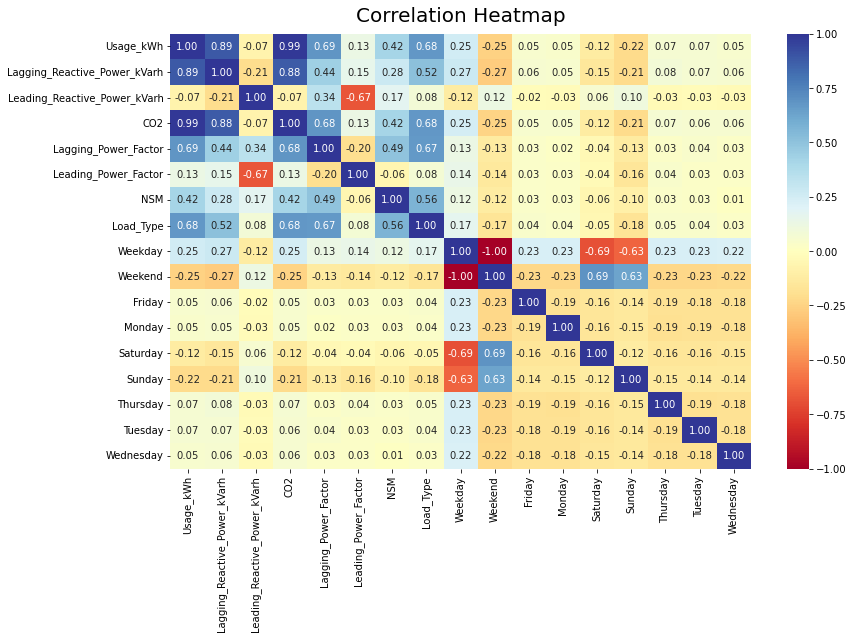

In [25]:
# Correlation Heatmap
plt.figure(figsize=(13, 8))
heatmap = sns.heatmap(df_steel_train.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlBu',fmt=".2f")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

Inference :  
    1. Values closer to 1 are showing stronger positive correlation  
    2. Values closer to -1 are showing stronger negative correlation

# Regression

### Training the model

### Create X_train and y_train from training dataset

In [26]:
# Popping out the 'price' column for y_train
y_train = df_steel_train.pop('Usage_kWh') 
# Creating X_train
X_train = df_steel_train

In [27]:
y_train.head()

3140     0.582008
6909     0.024303
9252     0.439305
2497     0.365759
25996    0.244179
Name: Usage_kWh, dtype: float64

In [28]:
X_train.head()

,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,Load_Type,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
3140,0.176098,0.000000,0.571429,0.9873,1.0000,0.726316,3,1,0,1,0,0,0,0,0,0
6909,0.054672,0.000000,0.000000,0.6413,1.0000,0.989474,1,1,0,0,0,0,0,0,1,0
9252,0.116282,0.094611,0.428571,0.9902,0.9999,0.389474,2,0,1,0,0,1,0,0,0,0
2497,0.394545,0.000000,0.428571,0.8674,1.0000,0.021053,1,0,1,0,0,1,0,0,0,0
25996,0.195119,0.000000,0.285714,0.9203,1.0000,0.810526,2,1,0,1,0,0,0,0,0,0


### Creating the linear regression model

In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### Feature selection using RFE

We have 16 independent features, we will use Recursive Feature Elimination (RFE) method to select features.   

By manually checking the correlation data and to use automated feature selection, we decided to select top 4 features

In [30]:
rfe = RFE(estimator=lm,n_features_to_select=4)
ref = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lagging_Reactive_Power_kVarh', True, 1),
 ('Leading_Reactive_Power_kVarh', False, 6),
 ('CO2', True, 1),
 ('Lagging_Power_Factor', True, 1),
 ('Leading_Power_Factor', True, 1),
 ('NSM', False, 4),
 ('Load_Type', False, 3),
 ('Weekday', False, 13),
 ('Weekend', False, 12),
 ('Friday', False, 8),
 ('Monday', False, 7),
 ('Saturday', False, 9),
 ('Sunday', False, 11),
 ('Thursday', False, 5),
 ('Tuesday', False, 2),
 ('Wednesday', False, 10)]

Features with Rank 1 are selected

In [32]:
#Features selected by RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Lagging_Reactive_Power_kVarh', 'CO2', 'Lagging_Power_Factor',
       'Leading_Power_Factor'],
      dtype='object')

In [33]:
#Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['Leading_Reactive_Power_kVarh', 'NSM', 'Load_Type', 'Weekday',
       'Weekend', 'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [34]:
# Creating X_train dataframe with RFE selected variables

X_train_1 = X_train[rfe_cols]
X_train_1.head()

,Lagging_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor
3140,0.176098,0.571429,0.9873,1.0000
6909,0.054672,0.000000,0.6413,1.0000
9252,0.116282,0.428571,0.9902,0.9999
2497,0.394545,0.428571,0.8674,1.0000
25996,0.195119,0.285714,0.9203,1.0000


In [35]:
# Adding constant because statsmodel library doesn't include the intercept by default.
X_train_sm_1 = sm.add_constant(X_train_1)

### Creating Model

In [36]:
# Creating model using Ordinary least Squares (OLS)
lr_1 = sm.OLS(y_train, X_train_sm_1)

In [37]:
# Fit the model
lr_model_1 = lr_1.fit()

In [38]:
# Print Summary
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 2.161e+05
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:50:05   Log-Likelihood:                 38711.
No. Observations:               19554   AIC:                        -7.741e+04
Df Residuals:                   19549   BIC:                        -7.737e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Model 1 - Analysis

### Overall model Fit  

F-stats is high, so the prob(F-stats) is low. Higher F-statistic indicates that there is a larger difference between the variance explained by the regression model and the variance left unexplained, which means that the regression model is more significant.

### R-squared and Adj. R-squared

R-squared = 0.978
Adj. R-squared = 0.978
Both R-squared and Adj. R-squared are high and same. This implies that the extent of the fit or the percentage of variance of the data explained by the model is high.

### p-values of coefficients

p values are zero. Next, lets check VIF.

In [39]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lagging_Power_Factor,27.96
3,Leading_Power_Factor,23.08
1,CO2,11.45
0,Lagging_Reactive_Power_kVarh,9.70


Inference and decision:  
    1. VIF are higher, which means multicollinearity. Hence, lets rebuilt model with top three features.  
  

### Creating Model 2 with top three features

In [40]:
rfe = RFE(estimator=lm,n_features_to_select=3)
ref = rfe.fit(X_train, y_train)

In [41]:
#Features selected by RFE
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Lagging_Reactive_Power_kVarh', 'CO2', 'Lagging_Power_Factor'], dtype='object')

In [42]:
# Creating X_train dataframe with RFE selected variables

X_train_2 = X_train[rfe_cols]
X_train_2.head()

,Lagging_Reactive_Power_kVarh,CO2,Lagging_Power_Factor
3140,0.176098,0.571429,0.9873
6909,0.054672,0.000000,0.6413
9252,0.116282,0.428571,0.9902
2497,0.394545,0.428571,0.8674
25996,0.195119,0.285714,0.9203


In [43]:
# Adding constant because statsmodel library doesn't include the intercept by default.
X_train_sm_2 = sm.add_constant(X_train_2)

In [44]:
# Creating model using Ordinary least Squares (OLS)
lr_2 = sm.OLS(y_train, X_train_sm_2)

In [45]:
# Fit the model
lr_model_2 = lr_2.fit()

In [46]:
# Print Summary
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              Usage_kWh   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 2.848e+05
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:50:06   Log-Likelihood:                 38601.
No. Observations:               19554   AIC:                        -7.719e+04
Df Residuals:                   19550   BIC:                        -7.716e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [47]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lagging_Reactive_Power_kVarh,7.74
1,CO2,7.59
2,Lagging_Power_Factor,2.41


### Model 2 - Analysis

### Overall model Fit  

F-stats got increased, which is good.

### R-squared and Adj. R-squared

R-squared = 0.978
Adj. R-squared = 0.978

They both continued to remain high

### p-values of coefficients and VIF

p values are zero and VIF values have reduced significantly, which means low multicollinearity

### Conclusion :

We are going ahead with lr_model_2 and conduct residual analysis


### Residual Analysis

In [48]:
# Find y_train prediction
y_train_pred = lr_model_2.predict(X_train_sm_2)

In [49]:
# Residual
residual = y_train - y_train_pred

<AxesSubplot:ylabel='Count'>

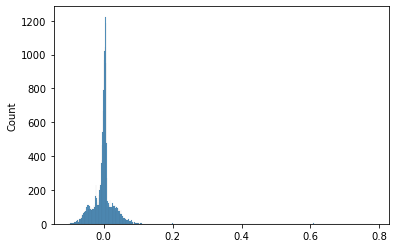

In [50]:
# Distribution of residuals or error terms
sns.histplot(residual)

Inference :  
    
    Residuals are normally distributed

### Model Testing and Evaluation

In [51]:
# Scale the test set variables with min-max scaler

# Transform the data
df_steel_test[num_vars] = scaler.transform(df_steel_test[num_vars])
df_steel_test.head()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,Load_Type,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
33766,0.433134,0.209714,0.094611,0.428571,0.9684,0.9999,0.747368,3,1,0,0,0,0,0,0,1,0
23079,0.275289,0.222275,0.000000,0.285714,0.9189,1.0000,0.421053,2,1,0,0,0,0,0,0,0,1
31698,0.023604,0.028831,0.000000,0.000000,0.8386,1.0000,0.200000,1,1,0,0,0,0,0,0,1,0
5801,0.528375,0.207202,0.124551,0.571429,0.9789,0.9999,0.442105,3,1,0,1,0,0,0,0,0,0
3207,0.259702,0.028831,0.086228,0.285714,0.9983,0.9998,0.421053,2,0,1,0,0,1,0,0,0,0


In [52]:
df_steel_test.describe()

,Usage_kWh,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,Load_Type,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000,8381.000000
mean,0.207007,0.191520,0.041990,0.201237,0.757503,0.988072,0.445003,1.701110,0.778069,0.221931,0.157022,0.159408,0.124329,0.097602,0.153442,0.156545,0.151653
std,0.222606,0.196760,0.150203,0.240748,0.181949,0.073626,0.292071,0.832247,0.415569,0.415569,0.363843,0.366078,0.329976,0.296793,0.360435,0.363393,0.358705
min,0.015587,0.000000,0.000000,0.000000,0.391000,0.300900,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020359,0.051681,0.000000,0.000000,0.585500,1.000000,0.200000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.037091,0.069745,0.000000,0.000000,0.800600,1.000000,0.400000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.366904,0.329465,0.000000,0.428571,0.919800,1.000000,0.684211,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.949103,0.984089,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
# Popping out the 'Usage_kWh' column for y_test
y_test = df_steel_test.pop('Usage_kWh')

# Creating X_test
X_test = df_steel_test

In [54]:
# Taking only the columns from the final model.
X_test = X_test[X_train_2.columns]
X_test.head()

,Lagging_Reactive_Power_kVarh,CO2,Lagging_Power_Factor
33766,0.209714,0.428571,0.9684
23079,0.222275,0.285714,0.9189
31698,0.028831,0.000000,0.8386
5801,0.207202,0.571429,0.9789
3207,0.028831,0.285714,0.9983


In [55]:
# Add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Lagging_Reactive_Power_kVarh,CO2,Lagging_Power_Factor
33766,1.0,0.209714,0.428571,0.9684
23079,1.0,0.222275,0.285714,0.9189
31698,1.0,0.028831,0.000000,0.8386
5801,1.0,0.207202,0.571429,0.9789
3207,1.0,0.028831,0.285714,0.9983


In [56]:
# Predict the model on the test set
y_test_pred = lr_model_2.predict(X_test_sm)

In [57]:
# Evaluate the model with r-squared on the test set
r2 = r2_score(y_test, y_test_pred)
r2

0.9796789310684971

In [58]:
from sklearn import metrics
import numpy as np
print("Mean Absolute Error :   ", metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean Squared Error :  ", metrics.mean_squared_error(y_test,y_test_pred))
print("Root Mean Squared Error :   ", np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

Mean Absolute Error :    0.01863342522948286
Mean Squared Error :   0.0010068628840886314
Root Mean Squared Error :    0.03173110278714926


Text(0, 0.5, 'y_test_pred')

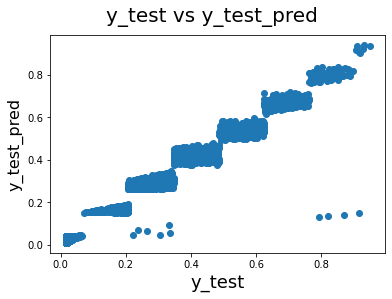

In [59]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_test_pred', fontsize=16)  

### Liner Regression Model Equation

Usage_kWh = -0.0325 + 0.1534 * Lagging_Reactive_Power_kVarh + 0.7636 * CO2 + 0.0749 * Lagging_Power_Factor

### Final Conclusion

R-Squared on test data is 0.979  
R-Squared on training data is  0.978

1. Model performed well on training data and test data both.
2. Close to 98% is a good score.
3. Overfitting seems to be an issue, which needs investigation and appropriate resolution. It can be further improved.
4. All three independent variables have postive coefficients, which implies increase in them results into increase in Usage.

This concludes Regression model.

# Classification

### Classification model to Predict Load Type

In [60]:
df_steel_train.head()

,Lagging_Reactive_Power_kVarh,Leading_Reactive_Power_kVarh,CO2,Lagging_Power_Factor,Leading_Power_Factor,NSM,Load_Type,Weekday,Weekend,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
3140,0.176098,0.000000,0.571429,0.9873,1.0000,0.726316,3,1,0,1,0,0,0,0,0,0
6909,0.054672,0.000000,0.000000,0.6413,1.0000,0.989474,1,1,0,0,0,0,0,0,1,0
9252,0.116282,0.094611,0.428571,0.9902,0.9999,0.389474,2,0,1,0,0,1,0,0,0,0
2497,0.394545,0.000000,0.428571,0.8674,1.0000,0.021053,1,0,1,0,0,1,0,0,0,0
25996,0.195119,0.000000,0.285714,0.9203,1.0000,0.810526,2,1,0,1,0,0,0,0,0,0


Inference & decision :  

We will choose "Load_Type" as target variable for classification Model.

In [61]:
df_classification = df_steel.copy()

df_classification['Load_Type'] = df_classification['Load_Type'].map({1:'Light_Load', 2:'Medium_Load', 3:'Maximum_Load'})
X_c = df_classification.drop('Load_Type', axis = 1)
y_c = df_classification['Load_Type']

In [62]:
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size = 0.2, random_state = 42)

In [63]:
df_classification['Load_Type'].unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

### Logistic Regression model for classification

In [64]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=300 )
log_reg.fit(X_c_train, y_c_train)
log_reg.score(X_c_test, y_c_test)

0.7481653839269733

Inference :  
  1. Accuracy score of Logistic Regression Tree model is shown above.
  2. We will see the accuracy of model using confusion Matrix, below.

In [65]:
from sklearn.metrics import confusion_matrix
y_train_pred = log_reg.predict(X_c_test)
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_c_test, y_train_pred)
cm

array([[2713,  130,  144],
       [ 114,  902,  303],
       [ 163,  553,  565]], dtype=int64)

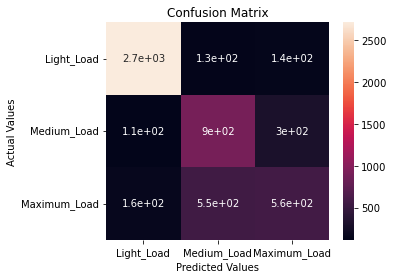

In [66]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Light_Load','Medium_Load','Maximum_Load'], 
                     columns = ['Light_Load','Medium_Load','Maximum_Load'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Decision Tree model for classification

In [67]:
from sklearn import tree

tree = tree.DecisionTreeClassifier()
tree_model = tree.fit(X_c_train, y_c_train)
# Find y_train prediction
y_train_pred = tree_model.predict(X_c_test)
tree_model.score(X_c_test, y_c_test)

0.8976194737784142

Inference :  
1. Accuracy score of Decision Tree model is shown above.
2. We will see the accuracy of model using confusion Matrix, below.

In [68]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_c_test, y_train_pred)
cm

array([[2953,   10,   24],
       [   7, 1089,  223],
       [  25,  283,  973]], dtype=int64)

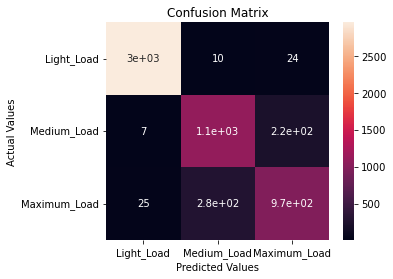

In [69]:
cm = confusion_matrix(y_c_test, y_train_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Light_Load','Medium_Load','Maximum_Load'], 
                     columns = ['Light_Load','Medium_Load','Maximum_Load'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

### Classification - Final Conclusion

Here we tried with 2 models for classification i.e Logistic Regression and Decision Tree.  

The accuracy score of Decision Tree (0.896) is better than that of Logistic Regression (0.748), hence we have decided to choose Decision Tree as final model.  

This concludes the Classification model.

# Ensemble

### Ensemble Model using Bagging to Predict Load Type

In [70]:
df_classification.Load_Type.value_counts()

Light_Load      15028
Maximum_Load     6721
Medium_Load      6186
Name: Load_Type, dtype: int64

Inference :  
As seen above the Decision Trees gave better accuracy, we will choose DecisionTreeClassifier as base classifier

In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(
          base_estimator=DecisionTreeClassifier(),
          n_estimators=100,
          max_samples=0.8,
          oob_score=True)

bagging.fit(X_c_train, y_c_train)
bagging.oob_score_

0.9163236083765885

In [72]:
bagging.score(X_c_test, y_c_test)

0.9185609450510113

In [73]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_c_test, y_train_pred)
cm

array([[2953,   10,   24],
       [   7, 1089,  223],
       [  25,  283,  973]], dtype=int64)

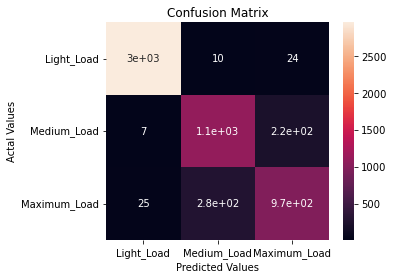

In [74]:
cm = confusion_matrix(y_c_test, y_train_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Light_Load','Medium_Load','Maximum_Load'], 
                     columns = ['Light_Load','Medium_Load','Maximum_Load'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Ensemble - Final Conclusion

An OOB score of 0.917 indicates that the BaggingClassifier is able to accurately predict the target variable for a large proportion of the training data that was not included in the bootstrap sample for each base estimator. This is a positive indication that the model has learned to capture important patterns in the training data, and may be able to generalize well to new unseen data.

This concludes Ensemble model. 

This is the end of this machine learning task on Steel Industry Energy Consuption Dataset.